In [2]:
cos_credentials = {  
                  "endpoint_url": "https://s3.us-south.cloud-object-storage.appdomain.cloud",  
                  "access_key_id": "c84ae1062b4a4c40bc3c027bced8ae00",  
                  "secret_access_key": "f171856c40db08ee746b2c6aa0ddf92c32512e5c97e46946"  
                  }  
  
wml_credentials = {
                    "apikey": "--Oc5iJ5bZCXbXTvgEA60AJrMzyHpQQoEtpOw3_nOkUm",
                    "iam_apikey_description": "Auto-generated for key 2fa93370-bb7d-44b3-bccc-92734fe8c559",
                    "iam_apikey_name": "Service credentials-1",
                    "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
                    "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/c5f670c96a918f80a72f96b65902e167::serviceid:ServiceId-cdfa117d-e576-4815-ba64-fc1de56fb04c",
                    "instance_id": "e3d88165-729f-41fd-9f4d-9f860a3e6fe1",
                    "url": "https://us-south.ml.cloud.ibm.com"
}

In [ ]:
!pip install -U --extra-index-url https://test.pypi.org/simple/ watson-machine-learning-client-V4==1.0.0.14

In [3]:
from watson_machine_learning_client.helpers import DataConnection, S3Connection, S3Location


credit_risk_conn = DataConnection(
    connection=S3Connection(endpoint_url=cos_credentials['endpoint_url'],
                            access_key_id=cos_credentials['access_key_id'],
                            secret_access_key=cos_credentials['secret_access_key']),
    location=S3Location(bucket='cos-lale',
                        path='height.csv'))

training_data_reference=[credit_risk_conn]

In [4]:
project_id = "9a6d4e31-e080-4324-a3d7-17487207de1b" #picked this from the url

In [5]:
from watson_machine_learning_client.experiment import AutoAI

experiment = AutoAI(wml_credentials, project_id=project_id)

pipeline_optimizer = experiment.optimizer(
    name='Height prediction - AutoAI',
    prediction_type=AutoAI.PredictionType.REGRESSION,
    prediction_column='height',
    scoring=AutoAI.Metrics.ROOT_MEAN_SQUARED_ERROR,
)

In [ ]:
pipeline_optimizer.get_params()

In [ ]:
run_details = pipeline_optimizer.fit(
            training_data_reference=training_data_reference,
            background_mode=False)

In [ ]:
pipeline_optimizer.get_run_status()

In [ ]:
summary = pipeline_optimizer.summary()
summary

In [ ]:
best_pipeline = pipeline_optimizer.get_pipeline()
best_pipeline.visualize()

In [ ]:
experiment.runs(filter='Height prediction - AutoAI').list()

In [6]:
run_id = "1fcd1d00-83b9-4aa9-a1c9-7f7f6806ed38"
historical_opt = experiment.runs.get_optimizer(run_id)
historical_opt.summary()

,Number of enhancements,holdout_explained_variance,training_neg_mean_squared_log_error,holdout_neg_median_absolute_error,holdout_neg_root_mean_squared_log_error,holdout_neg_mean_squared_error,training_explained_variance,training_r2,training_neg_median_absolute_error,training_neg_mean_squared_error,training_neg_root_mean_squared_error_(optimized),holdout_r2,training_neg_mean_absolute_error,holdout_neg_root_mean_squared_error,holdout_neg_mean_absolute_error,holdout_neg_mean_squared_log_error,training_neg_root_mean_squared_log_error
Pipeline Name,,,,,,,,,,,,,,,,,
Pipeline_1,0,1.0,-2.824284e-07,0.0,-3.857679e-08,0.0,0.999908,0.999902,0.0,-0.000002,-0.000861,1.0,-0.000222,0.0,0.0,-1.488169e-15,-0.000307
Pipeline_2,1,1.0,-2.824284e-07,0.0,-3.857679e-08,0.0,0.999908,0.999902,0.0,-0.000002,-0.000861,1.0,-0.000222,0.0,0.0,-1.488169e-15,-0.000307
Pipeline_3,2,1.0,-2.824284e-07,0.0,-3.857679e-08,0.0,0.999908,0.999902,0.0,-0.000002,-0.000861,1.0,-0.000222,0.0,0.0,-1.488169e-15,-0.000307
Pipeline_4,3,1.0,-2.824284e-07,0.0,-3.857679e-08,0.0,0.999908,0.999902,0.0,-0.000002,-0.000861,1.0,-0.000222,0.0,0.0,-1.488169e-15,-0.000307


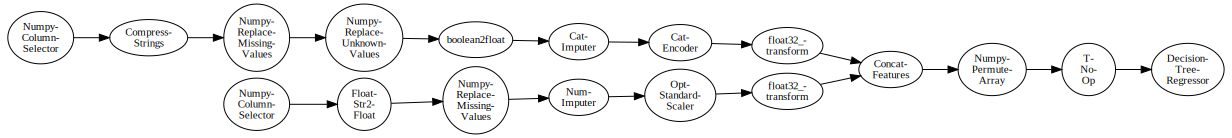

In [7]:
hist_pipeline = historical_opt.get_pipeline(pipeline_name='Pipeline_4')
hist_pipeline.visualize()

In [8]:
named_steps_list = [(op._impl, i) for i, op in enumerate(hist_pipeline._steps)]
named_steps_list
hist_pipeline.edges()

[(<lale.operators.TrainedIndividualOp at 0x149003240>,
  <lale.operators.TrainedIndividualOp at 0x149074390>),
 (<lale.operators.TrainedIndividualOp at 0x149074390>,
  <lale.operators.TrainedIndividualOp at 0x1490782b0>),
 (<lale.operators.TrainedIndividualOp at 0x1490782b0>,
  <lale.operators.TrainedIndividualOp at 0x137fb97b8>),
 (<lale.operators.TrainedIndividualOp at 0x137fb97b8>,
  <lale.operators.TrainedIndividualOp at 0x1490834e0>),
 (<lale.operators.TrainedIndividualOp at 0x1490834e0>,
  <lale.operators.TrainedIndividualOp at 0x14908cf98>),
 (<lale.operators.TrainedIndividualOp at 0x14908cf98>,
  <lale.operators.TrainedIndividualOp at 0x1490837b8>),
 (<lale.operators.TrainedIndividualOp at 0x1490837b8>,
  <lale.operators.TrainedIndividualOp at 0x1490036d8>),
 (<lale.operators.TrainedIndividualOp at 0x1490939b0>,
  <lale.operators.TrainedIndividualOp at 0x149078a58>),
 (<lale.operators.TrainedIndividualOp at 0x149078a58>,
  <lale.operators.TrainedIndividualOp at 0x149003780>),
 

In [9]:
from lale.lib.autoai_libs import CatEncoder
from lale.operators import TrainedIndividualOp
new_cat_encoder = CatEncoder(encoding='ordinal')
new_cat_encoder = TrainedIndividualOp(new_cat_encoder.name(), new_cat_encoder._impl, new_cat_encoder._schemas)
old_cat_encoder = hist_pipeline._steps[6]
new_cat_encoder._impl._autoai_tfm = old_cat_encoder._impl
hist_pipeline._steps[6] = new_cat_encoder
hist_pipeline._preds[hist_pipeline._steps[7]] = [new_cat_encoder]
hist_pipeline._preds[hist_pipeline._steps[6]] = [hist_pipeline._steps[5]]
del hist_pipeline._preds[old_cat_encoder]

In [10]:
#[(src, dst) for dst in hist_pipeline._steps for src in hist_pipeline._preds[dst]]
hist_pipeline.edges()

[(<lale.operators.TrainedIndividualOp at 0x149003240>,
  <lale.operators.TrainedIndividualOp at 0x149074390>),
 (<lale.operators.TrainedIndividualOp at 0x149074390>,
  <lale.operators.TrainedIndividualOp at 0x1490782b0>),
 (<lale.operators.TrainedIndividualOp at 0x1490782b0>,
  <lale.operators.TrainedIndividualOp at 0x137fb97b8>),
 (<lale.operators.TrainedIndividualOp at 0x137fb97b8>,
  <lale.operators.TrainedIndividualOp at 0x1490834e0>),
 (<lale.operators.TrainedIndividualOp at 0x1490834e0>,
  <lale.operators.TrainedIndividualOp at 0x14908cf98>),
 (<lale.operators.TrainedIndividualOp at 0x14908cf98>,
  <lale.operators.TrainedIndividualOp at 0x14bec00b8>),
 (<lale.operators.TrainedIndividualOp at 0x14bec00b8>,
  <lale.operators.TrainedIndividualOp at 0x1490036d8>),
 (<lale.operators.TrainedIndividualOp at 0x1490939b0>,
  <lale.operators.TrainedIndividualOp at 0x149078a58>),
 (<lale.operators.TrainedIndividualOp at 0x149078a58>,
  <lale.operators.TrainedIndividualOp at 0x149003780>),
 

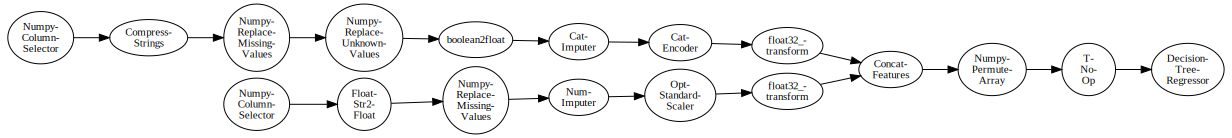

In [11]:
hist_pipeline.visualize()

In [12]:
training_df, holdout_df = historical_opt.get_data_connections()[0].read(with_holdout_split=True)
train_X = training_df.drop(['height'], axis=1).values
train_y = training_df['height'].values

#hist_pipeline = best_pipeline#historical_opt.get_pipeline(pipeline_name='Pipeline_3')

from sklearn.tree import ExtraTreeRegressor as EX_TREES
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import GradientBoostingRegressor as GB
from lale.lib.lale import Hyperopt
from lale.operators import TrainedPipeline
from lale import wrap_imported_operators
from lale.helpers import import_from_sklearn_pipeline
import logging
logger = logging.getLogger("lale.lib.lale.hyperopt")
logger.setLevel(logging.INFO)
wrap_imported_operators()

prefix = hist_pipeline.remove_last().freeze_trainable()

new_pipeline = prefix >> (DT | EX_TREES | GB)

hyperopt = Hyperopt(estimator=new_pipeline, cv=3, max_evals=20, scoring='r2')
hyperopt_pipelines = hyperopt.fit(train_X, train_y)

100%|██████████| 20/20 [01:07<00:00,  3.40s/trial, best loss: -0.9999017725149674]


In [14]:
hyperopt.summary()

AttributeError: 